In [1]:
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


In [2]:
from bingo import *
from graph import *
from counting import *
from latex import *

In [3]:
RUNS = 5_000_000
DECKS=[1,2,3,4,5,10,15,20,25,30,35,40]
palette = colorblind_palette(len(DECKS))

In [4]:
np.random.seed(56734)

In [5]:
%%time

df_jokers = quick_deck_matches_on(RUNS, accept_jokers=True, decks=DECKS)
df_jokers

CPU times: user 254 ms, sys: 660 ms, total: 914 ms
Wall time: 4min 46s


,Deck count,Results,Successes,N,Probability
0,1,0 9 1 14 2 16 3 ...,4998736,5000000,99.97472
1,2,0 2 1 6 2 6 3 ...,5000000,5000000,100.00000
2,3,0 8 1 0 2 0 3 ...,5000000,5000000,100.00000
3,4,0 4 1 13 2 4 3 ...,5000000,5000000,100.00000
4,5,0 7 1 1 2 0 3 ...,5000000,5000000,100.00000
5,10,0 1 1 4 2 3 3 ...,5000000,5000000,100.00000
6,15,0 0 1 0 2 1 3 ...,5000000,5000000,100.00000
7,20,0 0 1 0 2 1 3 ...,5000000,5000000,100.00000
8,25,0 0 1 0 2 3 3 ...,5000000,5000000,100.00000
9,30,0 1 1 0 2 0 3 ...,5000000,5000000,100.00000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


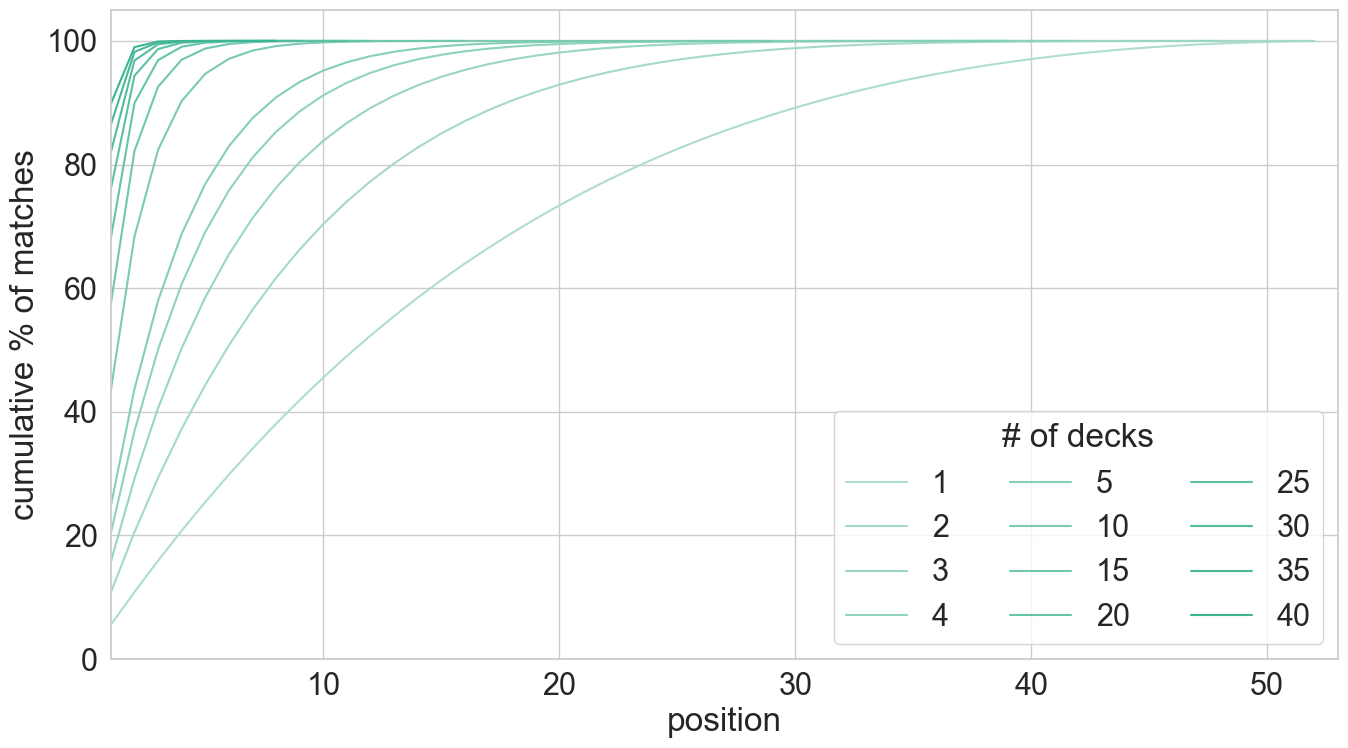

In [6]:
ax, data = print_cumulative(df_jokers, True, palette=palette[0], figsize=(14, 8))

plt.legend(loc='lower right', ncol=3, title="# of decks")
plt.xlim(1, 53)
plt.ylim(0, 105)
ax.set_xlabel("position")
ax.set_ylabel("cumulative % of matches")
plt.tight_layout()

plt.savefig(f"images/fig-the-naturally-ocurring-bingo-miracle.eps", dpi=300)
plt.show()

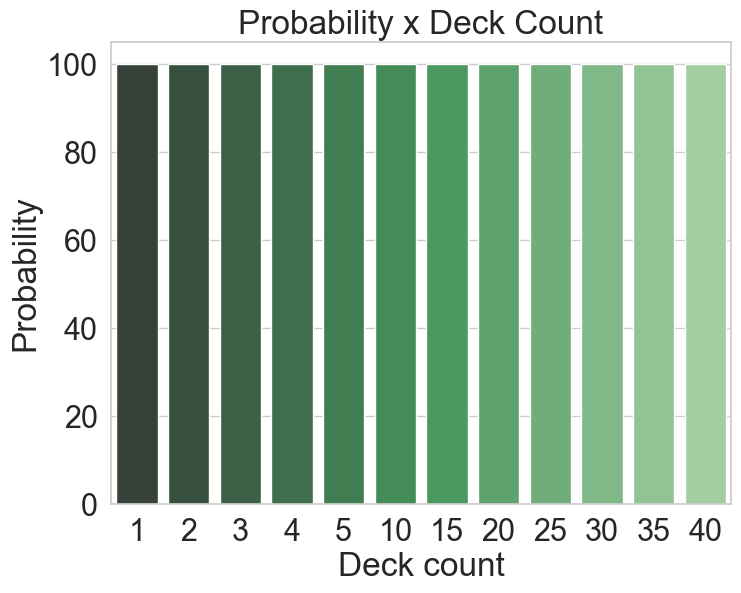

In [7]:
plot_all(df_jokers, "Probability")

In [8]:
prob_table_to_latex(df_jokers, name="the-naturally-ocurring-bingo-miracle")

\begin{table}[tb]
\label{tbl:the-naturally-ocurring-bingo-miracle}
\begin{tabular}{llll}
\toprule
 & Probability & CI lower & CI upper \\
Decks &  &  &  \\
\midrule
1 & 99.975% & 99.973% & 99.976% \\
2 & 100.000% & 100.000% & 100.000% \\
3 & 100.000% & 100.000% & 100.000% \\
4 & 100.000% & 100.000% & 100.000% \\
5 & 100.000% & 100.000% & 100.000% \\
10 & 100.000% & 100.000% & 100.000% \\
15 & 100.000% & 100.000% & 100.000% \\
20 & 100.000% & 100.000% & 100.000% \\
25 & 100.000% & 100.000% & 100.000% \\
30 & 100.000% & 100.000% & 100.000% \\
35 & 100.000% & 100.000% & 100.000% \\
40 & 100.000% & 100.000% & 100.000% \\
\bottomrule
\end{tabular}
\end{table}



In [9]:
data.head()

,decks,card,values
0,1,1,5.54540
1,1,2,10.85374
2,1,3,15.92496
3,1,4,20.76946
4,1,5,25.41114


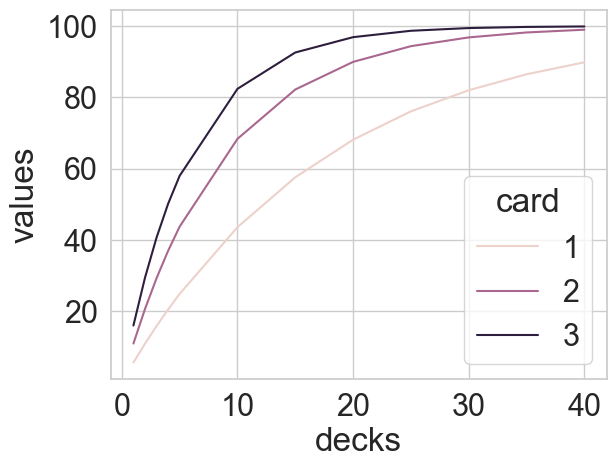

In [10]:
sns.lineplot(x="decks", y="values", hue="card", data=data.query("card <= 3"))
plt.show()

In [11]:
for i, (decks, card, values) in data.query("card==3").iterrows():
  print(decks, values, confidence(values * RUNS / 100, RUNS))


1.0 15.924960000000002 (0.15892912871879405, 0.15957059489149833)
2.0 29.334860000000003 (0.2929496736329374, 0.29374784391562586)
3.0 40.607839999999996 (0.4056480046171167, 0.4065089397064596)
4.0 50.0989 (0.5005507309422683, 0.5014272675379959)
5.0 57.97816 (0.5793488847718808, 0.5802141926326155)
10.0 82.38445999999999 (0.8235104317825921, 0.824178270585224)
15.0 92.59248 (0.9256949130697347, 0.9261540324376835)
20.0 96.89753999999999 (0.9688230613729487, 0.9691270179812459)
25.0 98.68984 (0.9867983540949467, 0.9869976977180707)
30.0 99.45476000000001 (0.9944826716908799, 0.9946117683680802)
35.0 99.77157999999999 (0.9976735710581701, 0.9977572641324102)
40.0 99.90522 (0.9990248412102011, 0.9990787919268154)
